# Reinforcement Learning Final Project 

Welcome to your Reinforcement Learning project focused on developing an RL agent capable of playing chess at a strategic level. Chess has long been considered a benchmark for measuring AI capabilities, and this project aims to leverage the power of RL to create an intelligent agent that can make optimal decisions in complex chess positions. By combining the principles of reinforcement learning with the rich strategic domain of chess, you will explore new approaches to create the most effective chess player.

## Project Objectives:

* Train an RL agent to play chess: The primary objective of this project is to develop an RL agent that can play chess at a high level of proficiency. The agent should be capable of evaluating chess positions and making strategic decisions.

* Optimize decision-making using RL algorithms: Explore different RL algorithms, as seen in class, to train the agent. Compare and analise their effectiveness in learning and decision-making capabilities in the context of chess.

* Use a challenging chess environment: Use a comprehensive environment for the agent to interact with, representing the rules and dynamics of chess. This environment will provide a realistic and challenging setting for the agent's training and evaluation.

* Evaluate and benchmark performance: Assess the performance of the RL agent against different benchmarks from existing chess engines. You will compare your agent's performance to established chess engines to measure progress and identify areas for improvement.


### Extra Objectives:

* Investigate transfer learning and generalization: Explore techniques for transfer learning to leverage knowledge acquired in related domains or from pre-training on large chess datasets. Investigate the agent's ability to generalize its knowledge.

* Enhance interpretability and analysis: Develop methods to analise the agent's decision-making process and provide insights into its strategic thinking. Investigate techniques to visualize the agent's evaluation of chess positions and understand its reasoning behind specific moves.

## Let's Play Chess! 

As you know [Chess](https://en.wikipedia.org/wiki/Chess) is a board game for two players, called White and Black, each controlling an army of chess pieces in their color, with the objective to checkmate the opponent's king.

Chess is an abstract strategy game that involves no hidden information and no use of dice or cards. It is played on a chessboard with 64 squares arranged in an eight-by-eight grid. At the start, each player controls sixteen pieces: one king, one queen, two rooks, two bishops, two knights, and eight pawns. White moves first, followed by Black. Checkmating the opponent's king involves putting the king under immediate attack (in "check") whereby there is no way for it to escape.


![](Images/CHESS_MOVES.PNG)

* The king moves one square in any direction. There is also a special move called castling that involves moving the king and a rook. The king is the most valuable piece — attacks on the king must be immediately countered, and if this is impossible, the game is immediately lost.
* A rook can move any number of squares along a rank or file, but cannot leap over other pieces. Along with the king, a rook is involved during the king's castling move.
* A bishop can move any number of squares diagonally, but cannot leap over other pieces.
* A queen combines the power of a rook and bishop and can move any number of squares along a rank, file, or diagonal, but cannot leap over other pieces.
* A knight moves to any of the closest squares that are not on the same rank, file, or diagonal. (Thus the move forms an "L"-shape: two squares vertically and one square horizontally, or two squares horizontally and one square vertically.) The knight is the only piece that can leap over other pieces.
* A pawn can move forward to the unoccupied square immediately in front of it on the same file, or on its first move it can advance two squares along the same file, provided both squares are unoccupied (black dots in the diagram). A pawn can capture an opponent's piece on a square diagonally in front of it by moving to that square (black crosses). It cannot capture a piece while advancing along the same file. A pawn has two special moves: the en passant capture and promotion.

## The [Environment](https://github.com/iamlucaswolf/gym-chess)

The environment gym-chess provides OpenAI Gym environments for the game of Chess. It comes with an implementation of the board and move encoding used in AlphaZero. 

Please install it using the command: 

`pip install gym-chess`


In [2]:
import chess
import gym
import gym_chess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm

### A Two player's game

As you know chess is played by two players, as such the gym-chess environment gives you access to both players actions in a sequential matter.

In [3]:
def WHITE_PLAYER_POLICY(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return action


def BLACK_PLAYER_POLICY(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return action

In [4]:
env = gym.make(
    'ChessAlphaZero-v0'
)  # We will use Alpha Zero's numenclature for the actions encodings

state = env.reset()
done = False
counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

while not done:
    if (
        counter % 2 == 0
    ):  # If the step number is pair, this means that it is the WHITE player's turn
        action = WHITE_PLAYER_POLICY(env, state)
        next_state, reward, done, info = env.step(action)

    else:  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
        action = BLACK_PLAYER_POLICY(env, state)
        next_state, reward, done, info = env.step(action)

    counter += 1

print(reward)

env.close()

0.0


#### The agent receives a reward of +1 when the white player makes a winning move, and a reward of -1 when the black player makes a winning move. 

All other rewards are zero.

### Evaluationg your agent with [Stockfish](https://github.com/zhelyabuzhsky/stockfish)

In order to have a good enough idea that our agent is actually playing well we need a benchmarkable opponent.

As such we need to install stockfish a free and open-source chess engine. Stockfish has consistently ranked first or near the top of most chess-engine rating lists and, as of April 2023, is the strongest CPU chess engine in the world.

`pip install stockfish`


In [5]:
from stockfish import Stockfish

StockFish has a python api as seen above, nevertheless the engine still needs to be downloaded [here](https://stockfishchess.org/download/) and used in the path.

NOTE: You were given an engine already in moodle, nevertheless different computer systems (Windows, Mac, Ubuntu) might require other Stockfish engines.

In [6]:
Stockfish_path = "stockfish_15.1_win_x64_avx2/stockfish-windows-2022-x86-64-avx2"


The functions bellow generate episodes/games for a WHITE or BLACK Pieces Scenario respectively. We store the outcome of the episode (win/draw/loss) and the number of steps taken.

#### Notice how the AGENT_POLICY function is used it recieves as inputs the env and the current state.
`action = AGENT_POLICY(env, state)`

In [7]:
def generate_WHITE_scenario(Stockfish_path, AGENT_POLICY):
    env = gym.make(
        "ChessAlphaZero-v0"
    )  # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system

    state = env.reset()
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

    while not done:
        if (
            counter % 2 == 0
        ):  # If the step number is pair, this means that it is the WHITE player's turn
            action = AGENT_POLICY(env, state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        else:  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1
        state = next_state

    env.close()

    return reward, np.ceil(counter / 2)


def generate_BLACK_scenario(Stockfish_path, AGENT_POLICY):
    env = gym.make(
        "ChessAlphaZero-v0"
    )  # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system

    state = env.reset()
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

    while not done:
        if (
            counter % 2 == 1
        ):  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
            action = AGENT_POLICY(env, state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        else:  # If the step number is pair, this means that it is the WHITE player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)
        
        state = next_state
        counter += 1


    env.close()

    return reward, np.ceil(counter / 2)

In the function bellow a visualization is produced from the bechmarks made.

In [8]:
def AGENT_EVALUATION(Stockfish_path, AGENT_POLICY, n_evaluations=100):
    results_list = []

    for evaluation_number in tqdm(range(n_evaluations)):
        generate_episode = generate_WHITE_scenario

        reward, n_steps = generate_episode(Stockfish_path, AGENT_POLICY)

        if reward == 1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["WHITE", result, n_steps])

        generate_episode = generate_BLACK_scenario

        reward, n_steps = generate_episode(Stockfish_path, AGENT_POLICY)

        if reward == -1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["BLACK", result, n_steps])

    df = pd.DataFrame(
        results_list, columns=["AGENT COLOR", "OUTCOME", "N STEPS"]
    ).astype("int", errors="ignore")

    plt.style.use("fivethirtyeight")

    results_group = (
        df.groupby(["AGENT COLOR", "OUTCOME"])
        .count()
        .rename(columns={"N STEPS": "GAMES"})
    )

    n_games = results_group.sum()[0]

    results_group = (2 * 100 * results_group / (n_games)).astype("int")

    viz_df = (
        results_group.reset_index()
        .pivot_table(index="AGENT COLOR", columns="OUTCOME", values="GAMES")
        .fillna(0)
    )

    viz_df.plot(kind="barh", stacked=True)

    plt.xlabel("Percentage")
    plt.title(f"EVALUATION RESULTS FOR {n_games} GAMES")

    plt.show()

    return df

  0%|          | 0/5 [00:00<?, ?it/s]

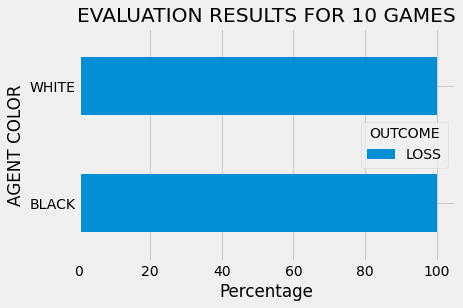

In [9]:
df = AGENT_EVALUATION(Stockfish_path, WHITE_PLAYER_POLICY, n_evaluations=5)

In [10]:
df.head(5)

,AGENT COLOR,OUTCOME,N STEPS
0,WHITE,LOSS,19
1,BLACK,LOSS,10
2,WHITE,LOSS,28
3,BLACK,LOSS,7
4,WHITE,LOSS,13


# Ready to Play Chess?

The first step in SARSA is to initialize  the Q-values. However the chess is very complex, so we will be using the 

In [146]:
import numpy as np
import gym
from IPython.display import clear_output, display
import torch
import torch.nn as nn
import sys
import torch.nn.functional as F
import random
import copy
import time
import matplotlib.pyplot as plt

class QNetwork(nn.Module):
    def __init__(self, state , output_size):
        self.output_size = output_size
        super(QNetwork, self).__init__()
        self.x_layer = nn.Linear(119, 150)
        self.h_layer = nn.Linear(150, 120)
        self.y_layer = nn.Linear(120, output_size)
        print(output_size)
        

    def forward(self, state):
        xh = F.relu(self.x_layer(state))
        hh = F.relu(self.h_layer(xh))
        state_action_values = self.y_layer(hh)
        return state_action_values.view(-1, self.output_size)

In [171]:
class DQNAgent(object):
    def __init__(self, state, action_dim):
        self.qnet = QNetwork(state, action_dim)
        self.qnet_optim = torch.optim.Adam(self.qnet.parameters(), lr=0.001)
        self.discount_factor = 0.99
        self.MSELoss_function = nn.MSELoss()
        self.replay_buffer = ReplayBuffer()
        pass
    
    def SARSA_POLICY(self, env, state, epsilon):

        if np.random.uniform(0, 1) < epsilon:
                legal_actions = env.legal_actions
                return np.random.choice(legal_actions)  # choose random action
        else:
                state_tensor = torch.from_numpy(state).float()
                network_output = self.qnet(state_tensor)
                reshaped_output = network_output[0]
                print(reshaped_output.shape)
                legal_q_values= reshaped_output[env.legal_actions]
                return env.legal_actions[np.argmax(legal_q_values.detach().numpy())]  # choose greedy action

    def update_Q_Network(self, state, next_state, action, reward, terminals):

        state_tensor = torch.from_numpy(state).float()
        qsa = torch.gather(self.qnet(state_tensor), dim=1, index=action.long())
        qsa_next_action = self.qnet(next_state)
        qsa_next_action,_ = torch.max(qsa_next_action, dim=1, keepdim=True)
        not_terminals = 1 - terminals
        qsa_next_target = reward + not_terminals * self.discount_factor * qsa_next_action
        q_network_loss = self.MSELoss_function(qsa, qsa_next_target.detach())
        self.qnet_optim.zero_grad()
        q_network_loss.backward()
        self.qnet_optim.step()
        
    def update_Sarsa_Network(self, state, next_state, action, next_action, reward, terminals):
        state_tensor = torch.from_numpy(state).float()

        qsa = torch.gather(self.qnet(state_tensor), dim=1, index=action.long())

        qsa_next_action = torch.gather(self.qnet(next_state), dim=1, index=next_action.long())

        not_terminals = 1 - terminals

        qsa_next_target = reward + not_terminals * (self.discount_factor * qsa_next_action)

        q_network_loss = self.MSELoss_function(qsa, qsa_next_target.detach())
        self.qnet_optim.zero_grad()
        q_network_loss.backward()
        self.qnet_optim.step()
        
    def update(self, update_rate):
        for i in range(update_rate):
            states, next_states, actions, rewards, terminals = self.replay_buffer.sample_minibatch(64)
            states = torch.Tensor(states)
            next_states = torch.Tensor(next_states)
            actions = torch.Tensor(actions)
            rewards = torch.Tensor(rewards)
            terminals = torch.Tensor(terminals)
            self.update_Q_Network(states, next_states, actions, rewards, terminals)
            
    def update_s(self, update_rate):
        for i in range(update_rate):
            states, next_states, actions, next_actions, rewards, terminals = self.replay_buffer.sample_minibatch_sarsa(64)
            states = torch.Tensor(states)
            next_states = torch.Tensor(next_states)
            actions = torch.Tensor(actions)
            next_actions = torch.Tensor(next_actions)
            rewards = torch.Tensor(rewards)
            terminals = torch.Tensor(terminals)
            self.update_Sarsa_Network(states, next_states, actions, next_actions, rewards, terminals)
    def best_move(self, state):
        state_tensor = torch.from_numpy(state).float()
        
        return np.argmax(self.qnet(state_tensor).data.numpy())

In [172]:
class ReplayBuffer(object):
    def __init__(self):
        self.buffer = []
        self.buffer_s = []
        
    def add_to_buffer(self, data):
        #data must be of the form (state,next_state,action,reward,terminal)
        self.buffer.append(data)
        
    def add_to_buffer_sarsa(self, data):
        #data must be of the form (state,next_state,action,n_action,reward,terminal)
        self.buffer_s.append(data)

    def sample_minibatch(self,minibatch_length):
        states = []
        next_states = []
        actions = []
        rewards = []
        terminals = []
        for i in range(minibatch_length):
            random_int = np.random.randint(0, len(self.buffer)-1) 
            transition = self.buffer[random_int]
            states.append(transition[0])
            next_states.append(transition[1])
            actions.append(transition[2])
            rewards.append(transition[3])
            terminals.append(transition[4])
        return torch.Tensor(states), torch.Tensor(next_states), torch.Tensor(actions), torch.Tensor(rewards), torch.Tensor(terminals)

    def sample_minibatch_sarsa(self,minibatch_length):
        states = []
        next_states = []
        actions = []
        next_actions = []
        rewards = []
        terminals = []
        for i in range(minibatch_length):
            random_int = np.random.randint(0, len(self.buffer_s)-1) 
            transition = self.buffer_s[random_int]
            states.append(transition[0])
            next_states.append(transition[1])
            actions.append(transition[2])
            next_actions.append(transition[3])
            rewards.append(transition[4])
            terminals.append(transition[5])
        return torch.Tensor(states), torch.Tensor(next_states), torch.Tensor(actions), torch.Tensor(next_actions), torch.Tensor(rewards), torch.Tensor(terminals)

In [173]:
def generate_WHITE_SARSA(Stockfish_path, agent):
    env = gym.make("ChessAlphaZero-v0")  # We will use Alpha Zero's numenclature for the actions encodinng
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(100) 
    counter = 0 
    done = False
    
    #initialize the state by resetting the environment
    state = env.reset()


    #for each step in the episode:
    while not done:
        print('counter', counter)
        if (counter % 2 == 0):
            action= agent.SARSA_POLICY(env, state, epsilon=0.5)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
                
            #perform the selected action and store the next state information: 
            next_state, reward, done, info = env.step(action)
            #update next state to current state
            
            state = next_state
            #update next action to current action

        else:  
            # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        #if the current state is the terminal state then break:
        if done:
            break

        counter += 1


    env.close()

    return reward, np.ceil(counter / 2)


def generate_BLACK_SARSA(Stockfish_path, agent):
    env = gym.make("ChessAlphaZero-v0")  # We will use Alpha Zero's numenclature for the actions encodinng
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(100) 
    counter = 0 
    done = False
    
    #initialize the state by resetting the environment
    state = env.reset()

    #for each step in the episode:
    while not done:
        if (counter % 2 == 0):
            action= agent.SARSA_POLICY(env, state, epsilon=0.5)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
                
            #perform the selected action and store the next state information: 
            next_state, reward, done, info = env.step(action)
            #update next state to current state
            
            state = next_state

        else:  
            # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        #if the current state is the terminal state then break:
        if done:
            break

        counter += 1


    env.close()

    return reward, np.ceil(counter / 2)

In [174]:
def AGENT_EVALUATION(Stockfish_path, n_evaluations=100):
    results_list = []
    env= gym.make("ChessAlphaZero-v0")
    env.reset()
    
    WHITE_agent = DQNAgent(state.shape, env.action_space.n)
    BLACK_agent = DQNAgent(state.shape, env.action_space.n)

    for evaluation_number in tqdm(range(n_evaluations)):
        generate_episode = generate_WHITE_SARSA

        reward, n_steps = generate_episode(Stockfish_path, WHITE_agent)

        if reward == 1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["WHITE", result, n_steps])

        generate_episode = generate_BLACK_SARSA

        reward, n_steps = generate_episode(Stockfish_path, BLACK_agent)

        if reward == -1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["BLACK", result, n_steps])

    df = pd.DataFrame(
        results_list, columns=["AGENT COLOR", "OUTCOME", "N STEPS"]
    ).astype("int", errors="ignore")

    plt.style.use("fivethirtyeight")

    results_group = (
        df.groupby(["AGENT COLOR", "OUTCOME"])
        .count()
        .rename(columns={"N STEPS": "GAMES"})
    )

    n_games = results_group.sum()[0]

    results_group = (2 * 100 * results_group / (n_games)).astype("int")

    viz_df = (
        results_group.reset_index()
        .pivot_table(index="AGENT COLOR", columns="OUTCOME", values="GAMES")
        .fillna(0)
    )

    viz_df.plot(kind="barh", stacked=True)

    plt.xlabel("Percentage")
    plt.title(f"EVALUATION RESULTS FOR {n_games} GAMES")

    plt.show()

    return df

4672
4672


  0%|          | 0/2 [00:00<?, ?it/s]

counter 0
counter 1
counter 2
torch.Size([4672])
counter 3
counter 4
torch.Size([4672])
counter 5
counter 6
counter 7
counter 8
torch.Size([4672])
counter 9
counter 10
torch.Size([4672])
counter 11
counter 12
torch.Size([4672])
counter 13
counter 14
counter 15
counter 16
counter 17
counter 18
torch.Size([4672])
counter 19
counter 20
counter 21
counter 22
torch.Size([4672])
counter 23
counter 24
torch.Size([4672])
counter 25
counter 26
counter 27
counter 28
counter 29
counter 30
torch.Size([4672])
counter 31
counter 32
counter 33
torch.Size([4672])
torch.Size([4672])
torch.Size([4672])
torch.Size([4672])
torch.Size([4672])
torch.Size([4672])
torch.Size([4672])
torch.Size([4672])
torch.Size([4672])
torch.Size([4672])
torch.Size([4672])
torch.Size([4672])
torch.Size([4672])
torch.Size([4672])
counter 0
torch.Size([4672])
counter 1
counter 2
torch.Size([4672])
counter 3
counter 4
counter 5
counter 6
counter 7
counter 8
counter 9
counter 10
torch.Size([4672])
counter 11
counter 12
counter 1

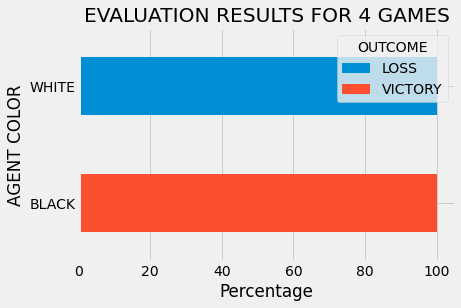

In [175]:
#number of episodes
num_episodes = 2 #1000

# Define the batch size:
batch_size = 32 #128

df = AGENT_EVALUATION(Stockfish_path, n_evaluations=num_episodes) 

In [176]:
df

,AGENT COLOR,OUTCOME,N STEPS
0,WHITE,LOSS,17
1,BLACK,VICTORY,19
2,WHITE,LOSS,15
3,BLACK,VICTORY,11
